In [10]:
import os
import time

new_directory_path = "C:/Users/rupsm/Robotics/FTC_SystemSim"  # Replace with your desired path

# Change the current working directory
os.chdir(new_directory_path)

# Get the current working directory (optional, for verification)
print(f"Current working directory before change: {os.getcwd()}")
#invoke all libraries
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math as m

%run -i "C:\Users\rupsm\Robotics\FTC_SystemSim\FTC_SystemSim\Robotics\FTC_SystemSim\main.py"


Current working directory before change: C:\Users\rupsm\Robotics\FTC_SystemSim


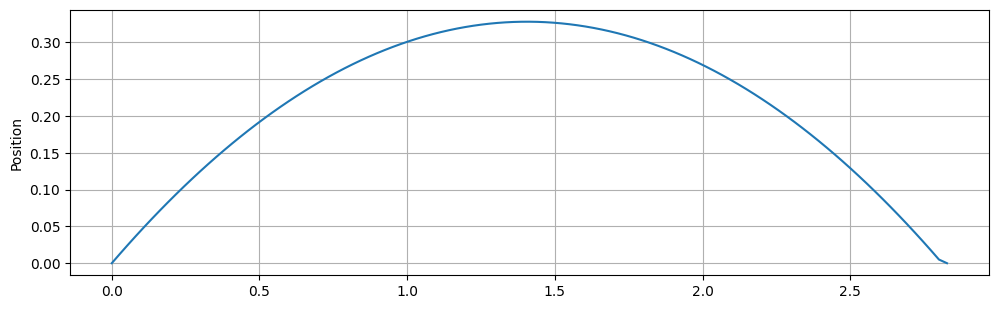

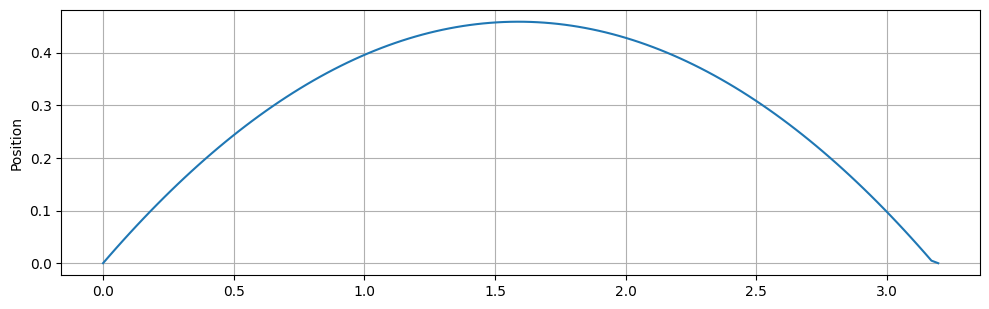

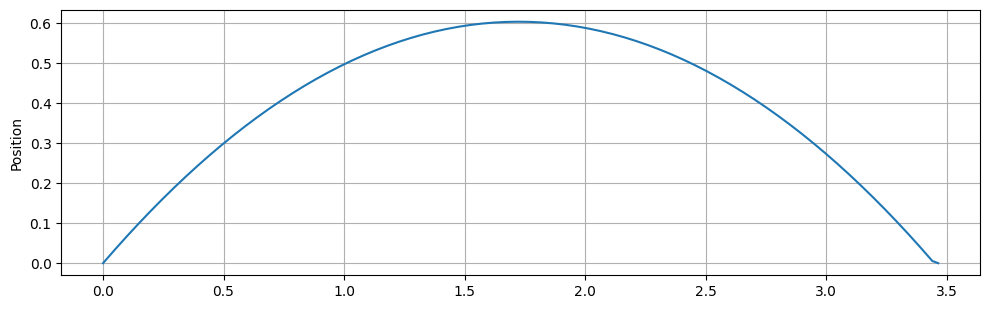

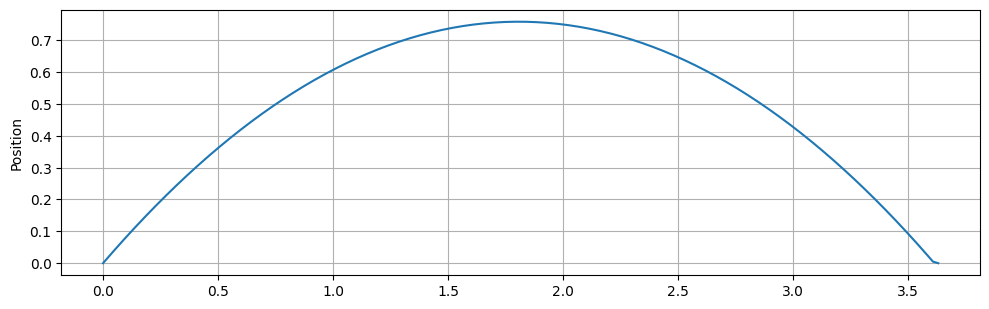

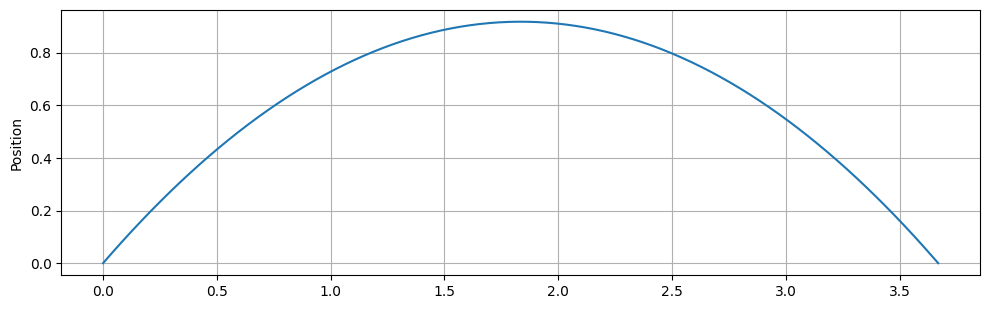

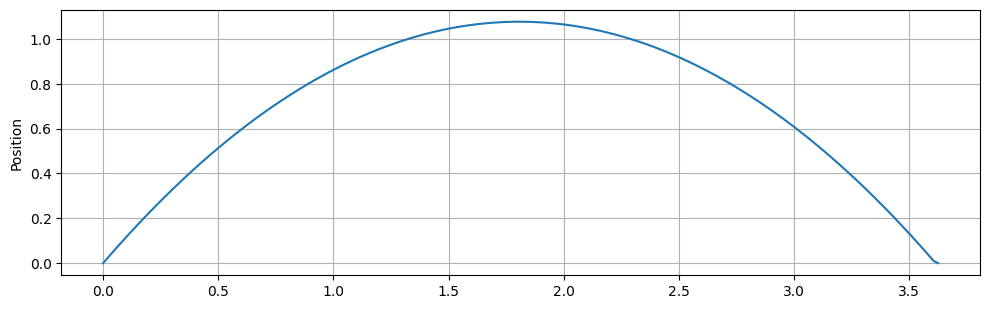

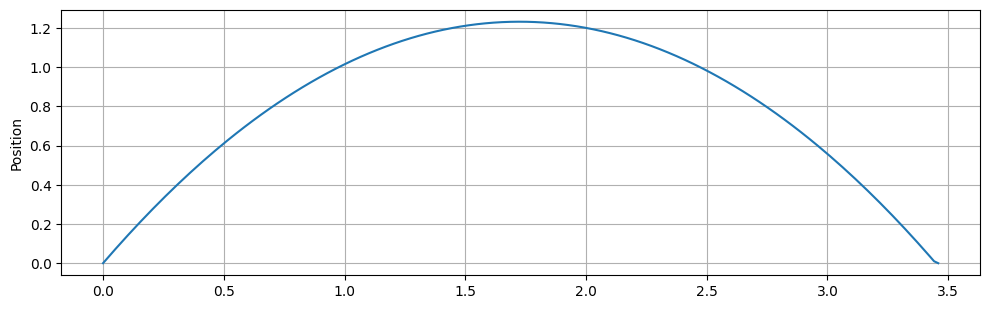

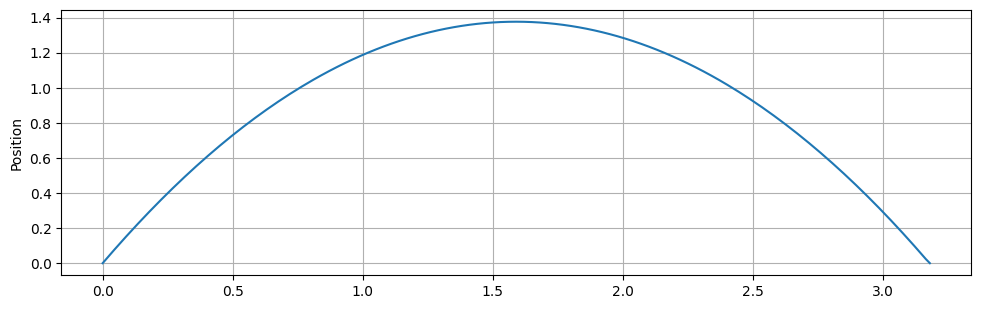

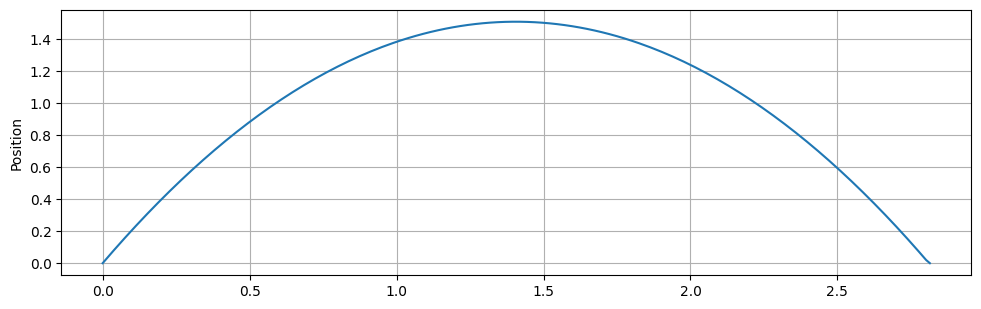

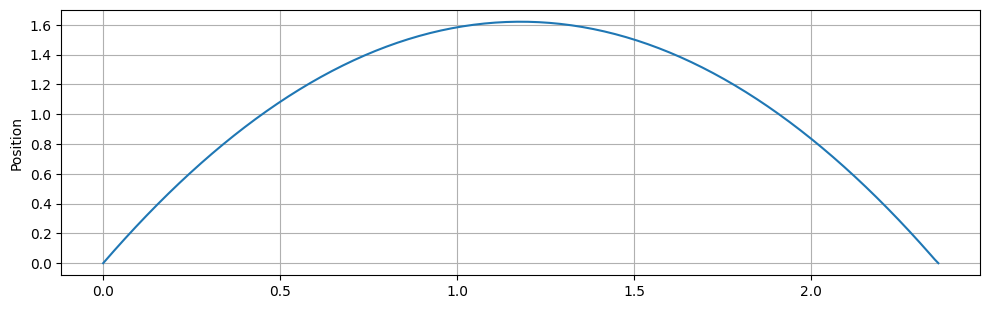

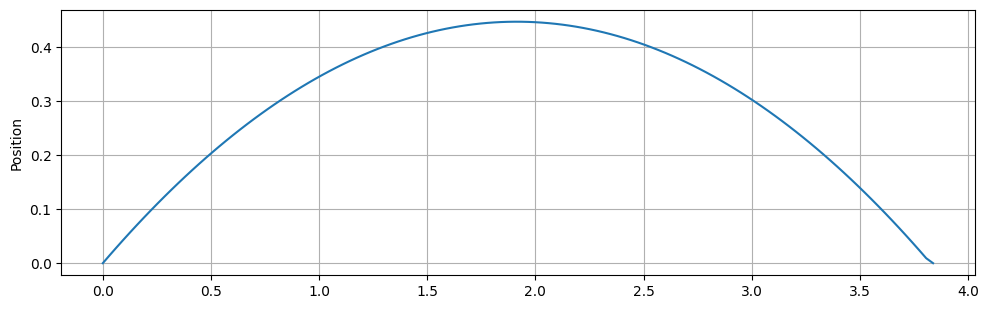

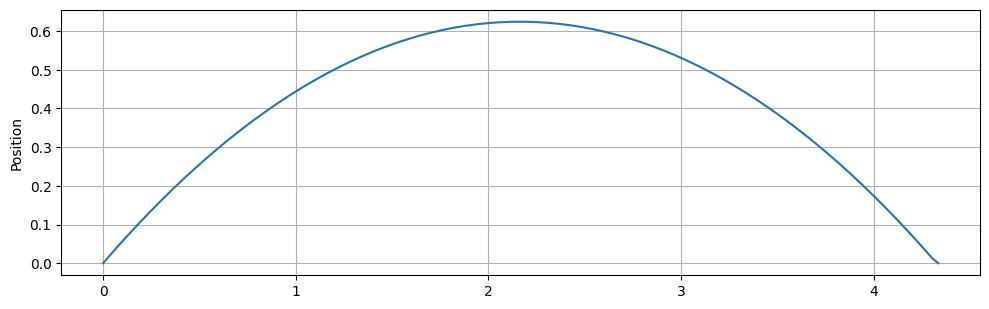

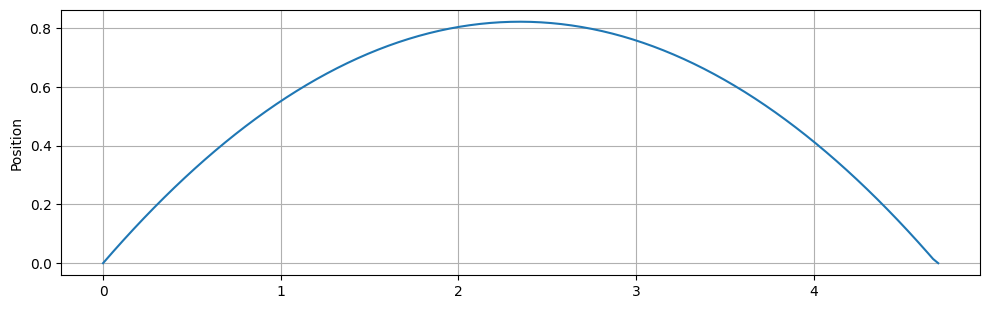

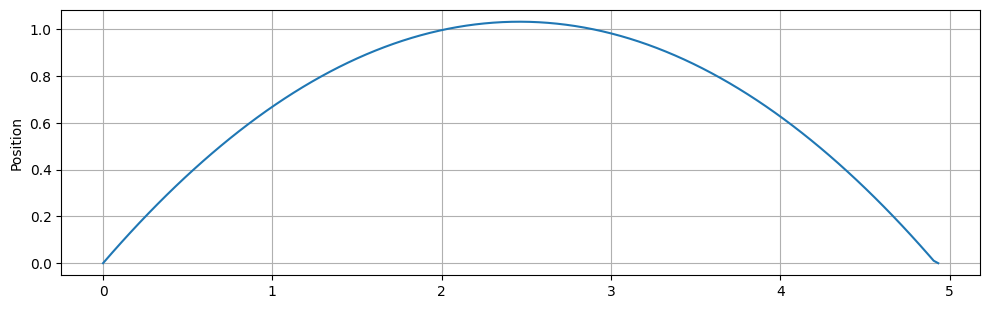

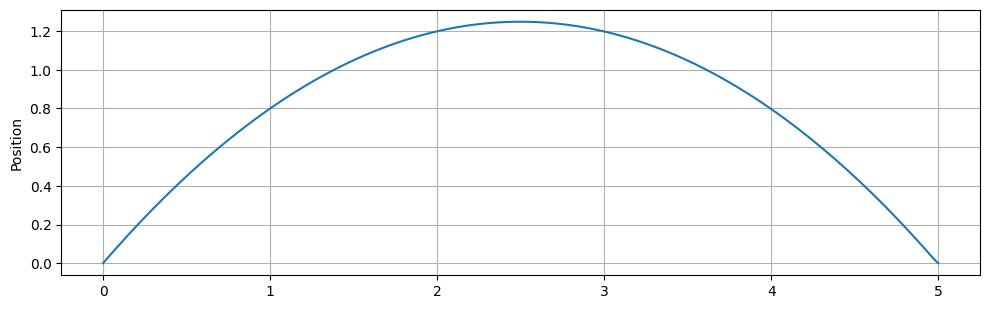

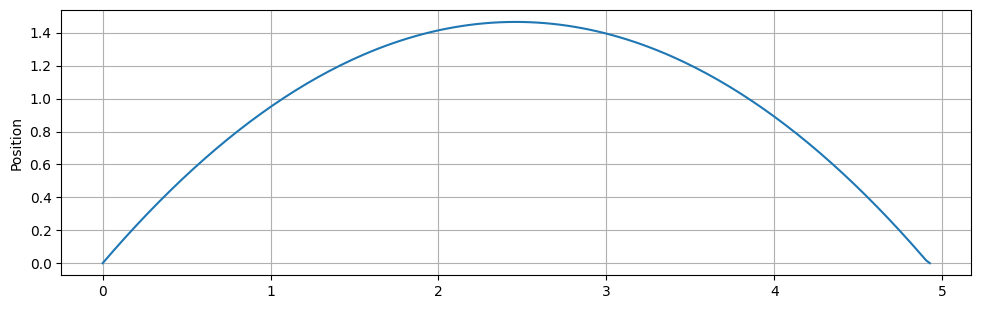

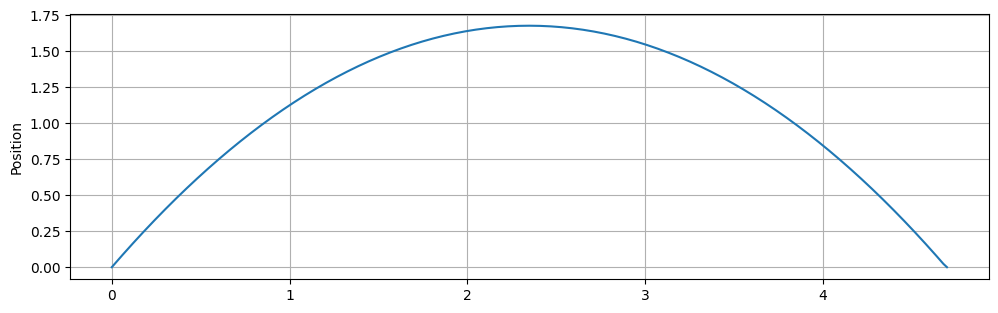

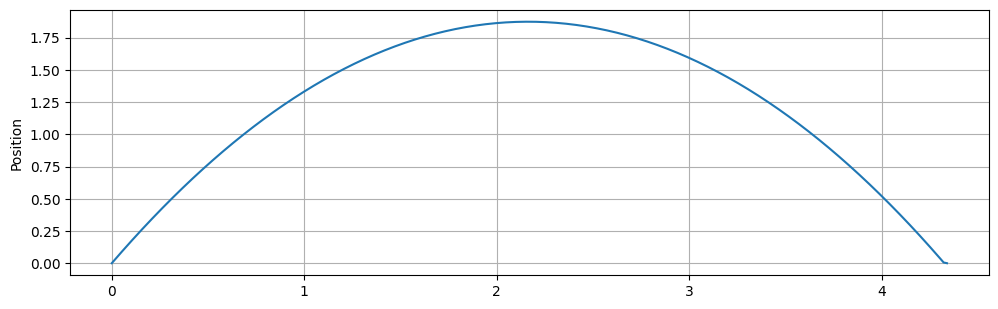

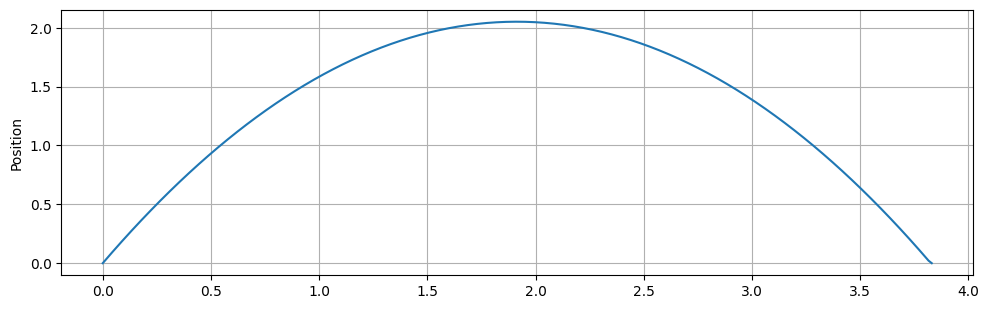

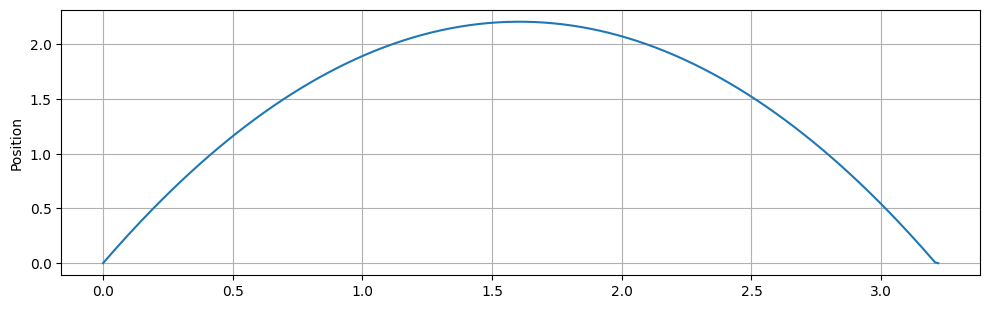

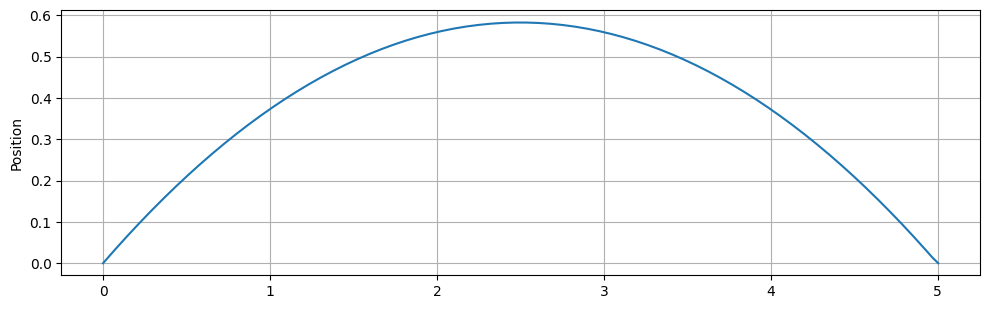

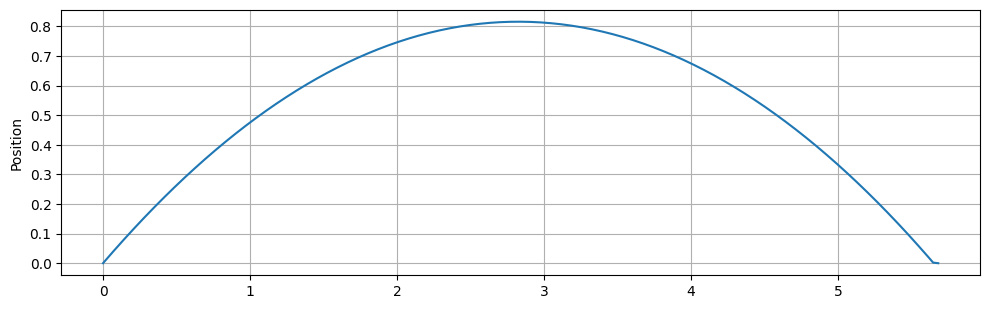

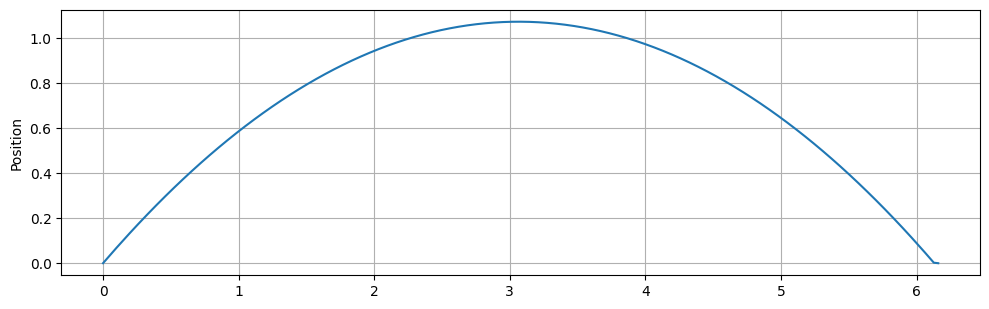

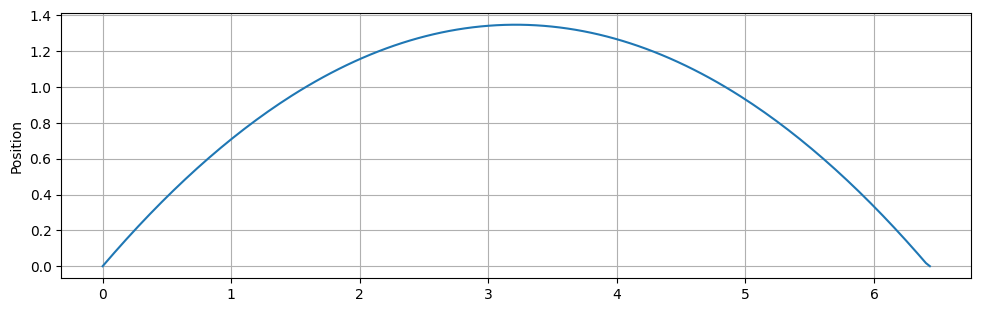

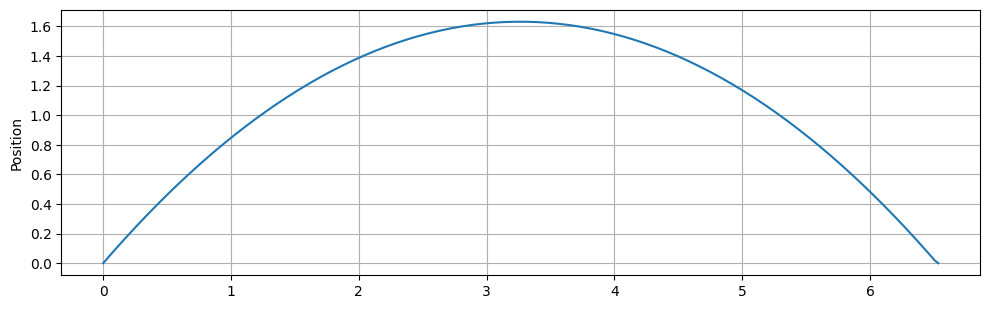

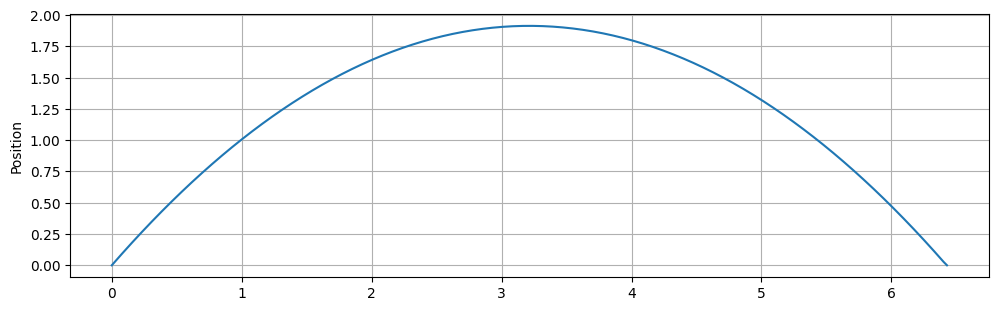

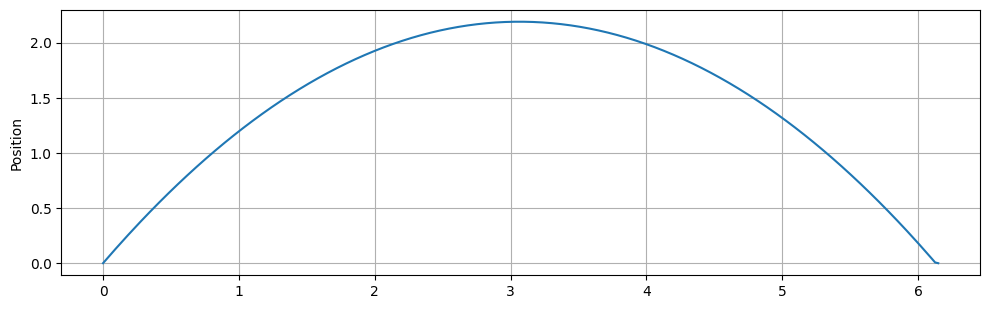

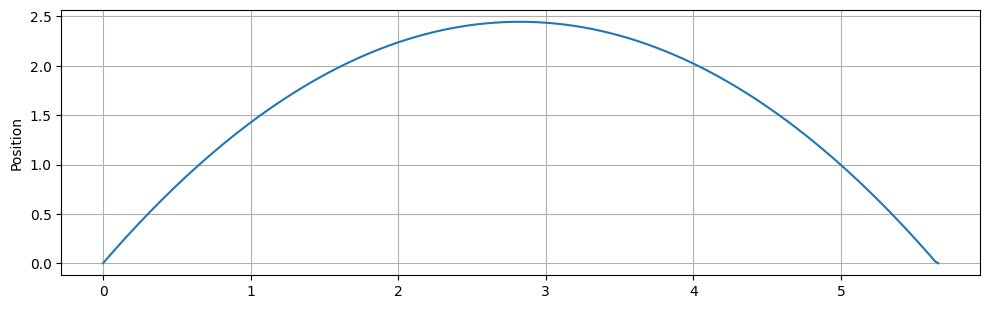

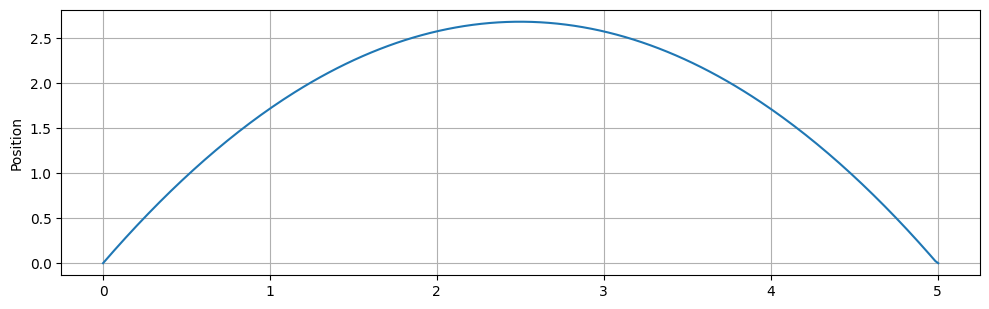

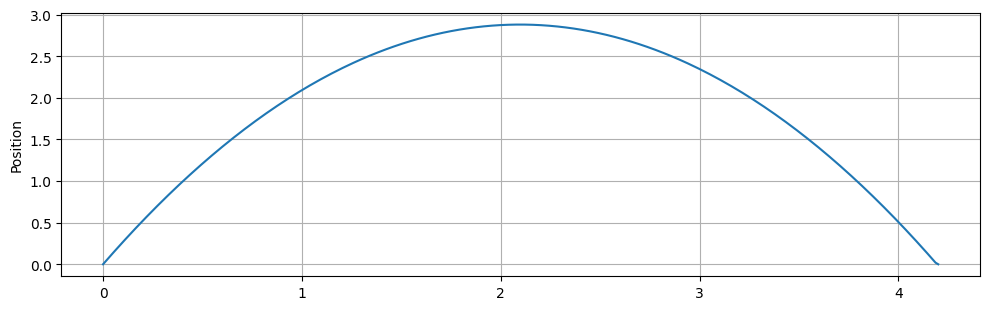

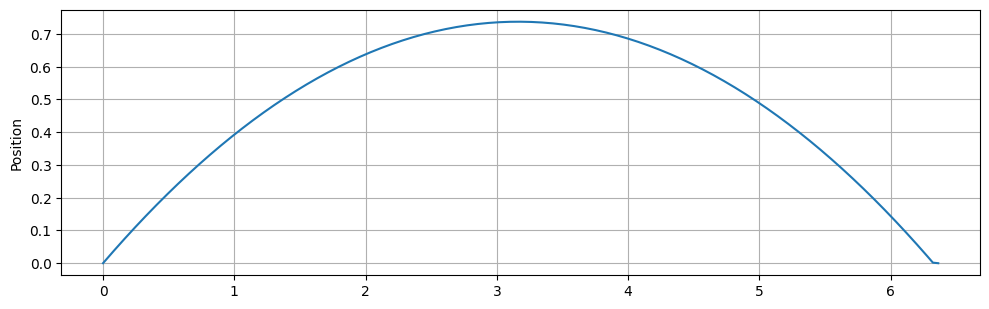

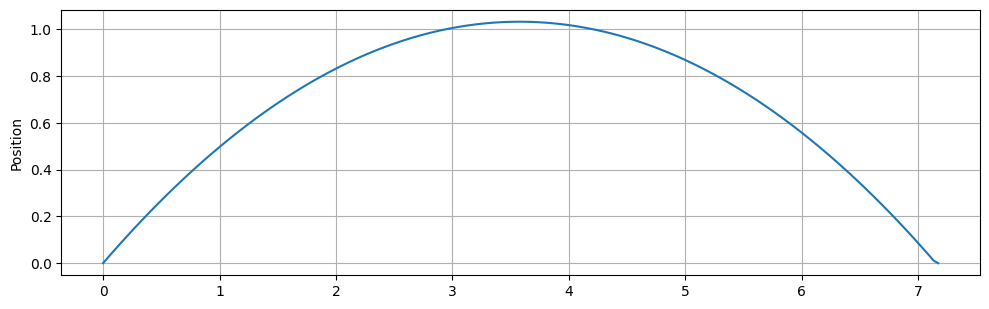

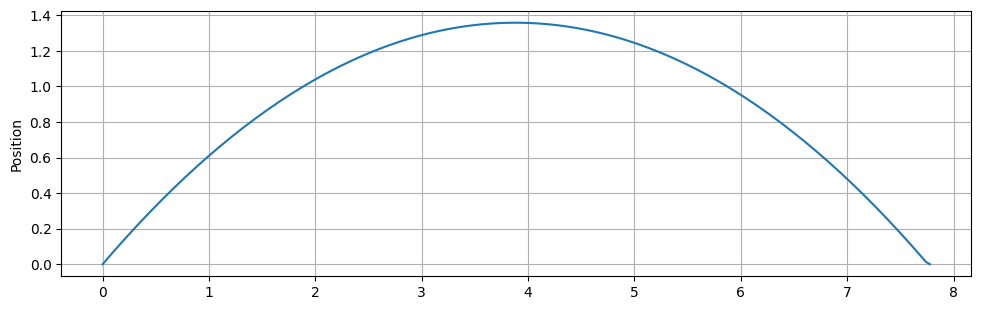

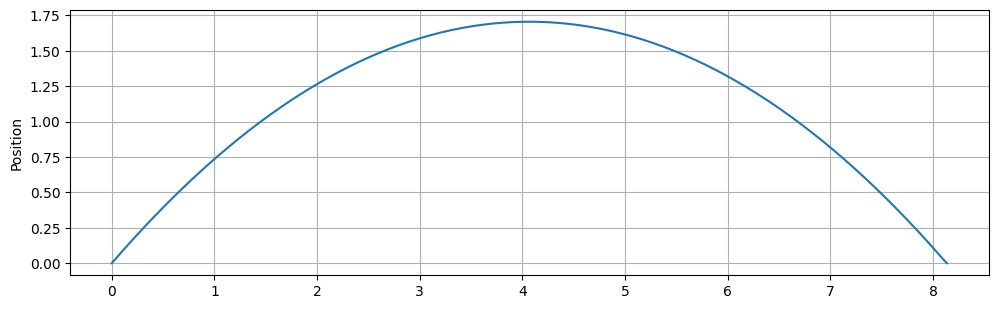

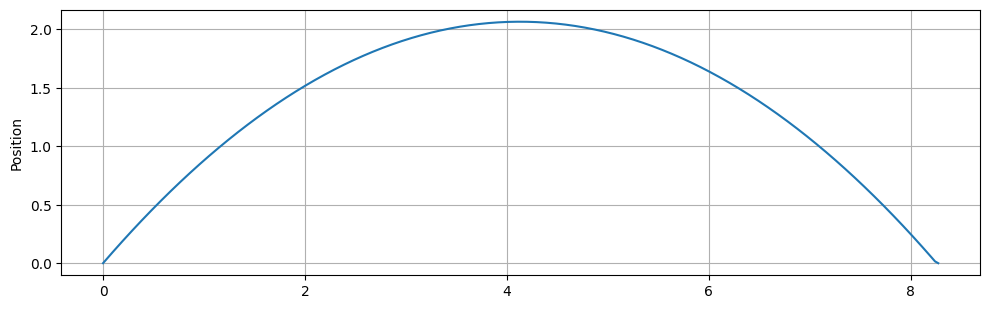

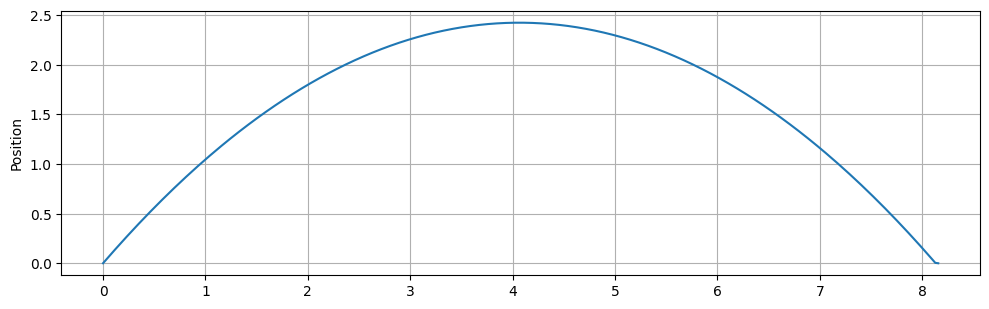

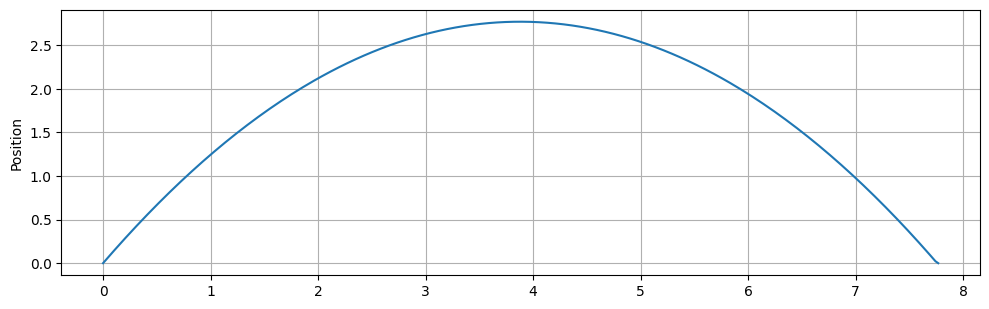

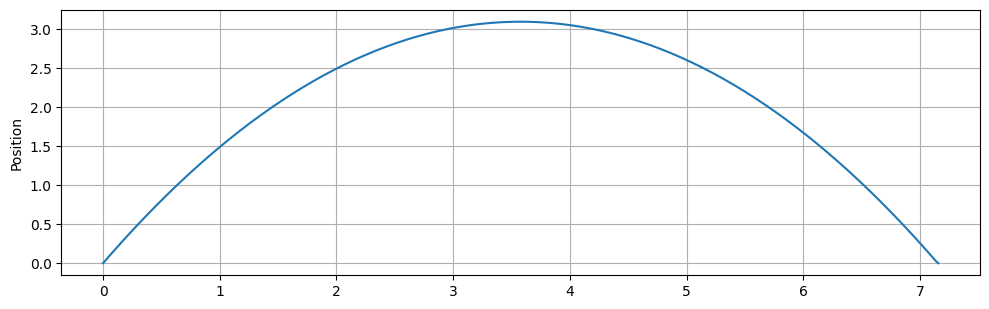

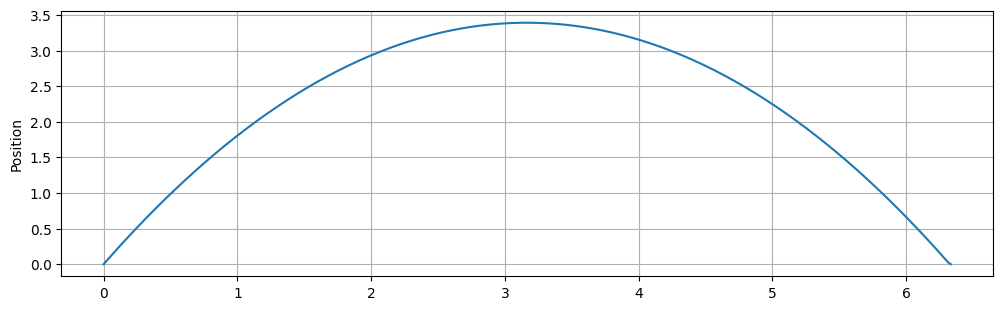

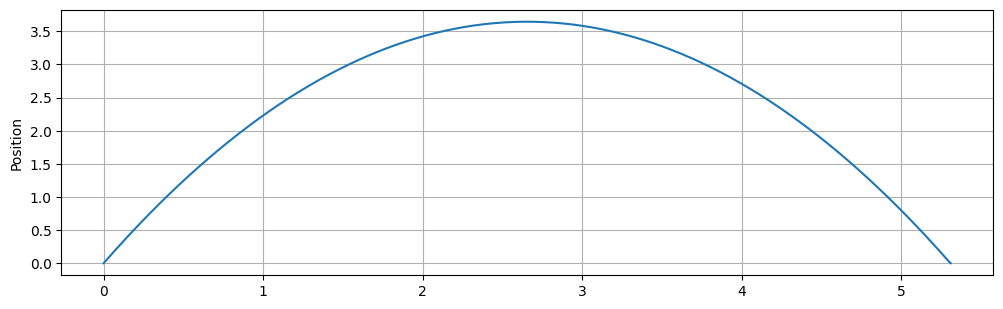

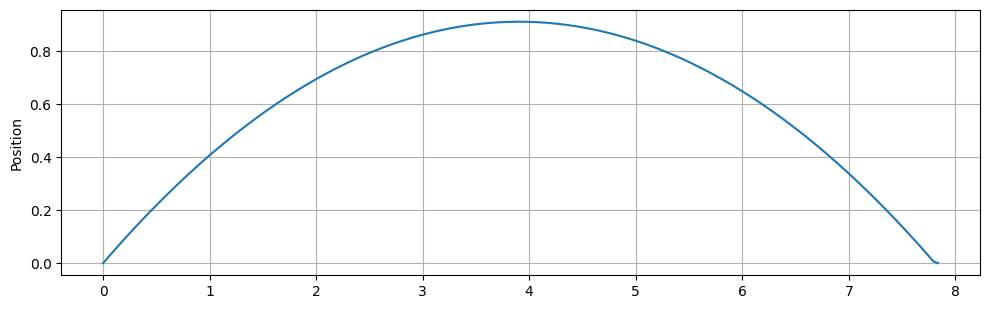

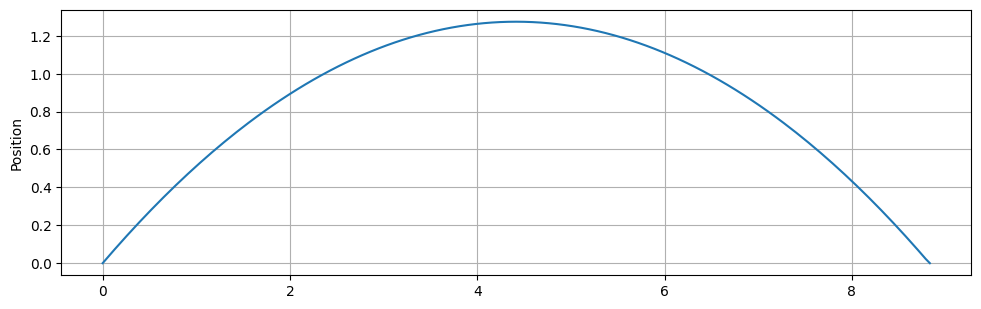

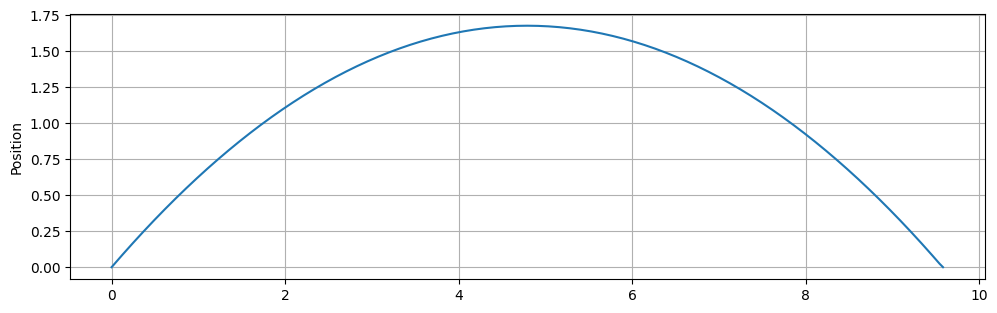

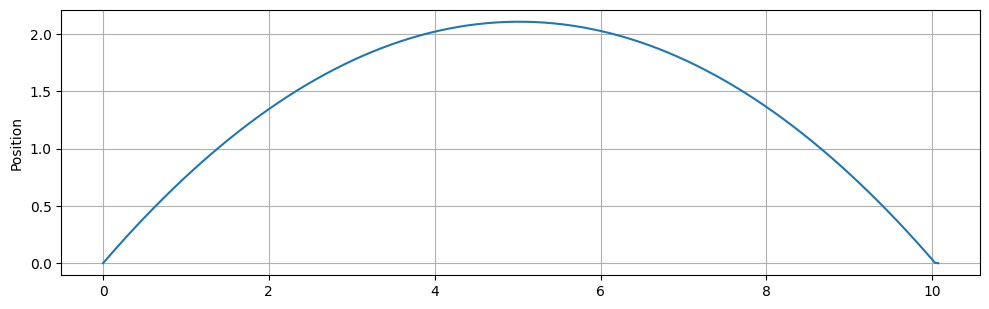

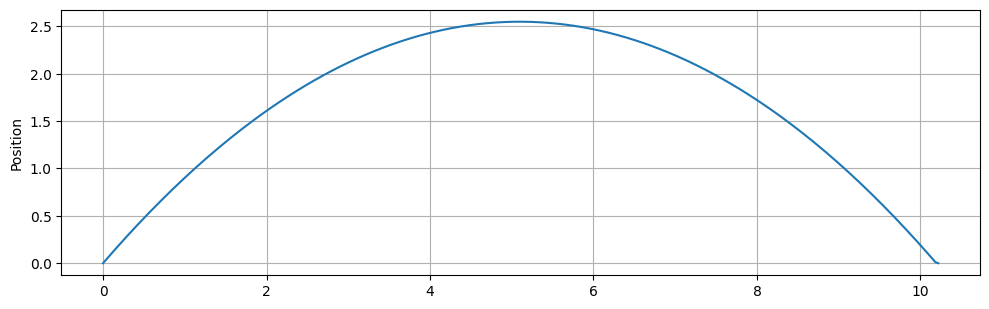

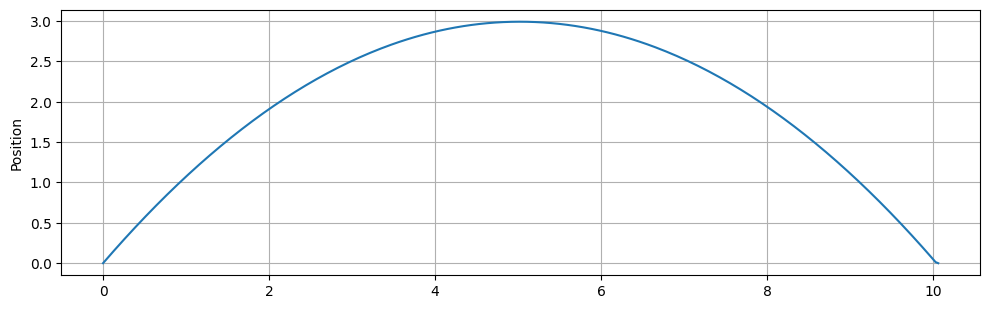

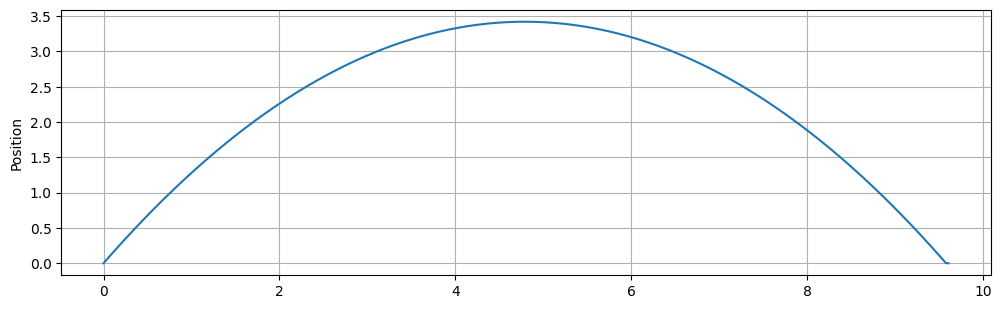

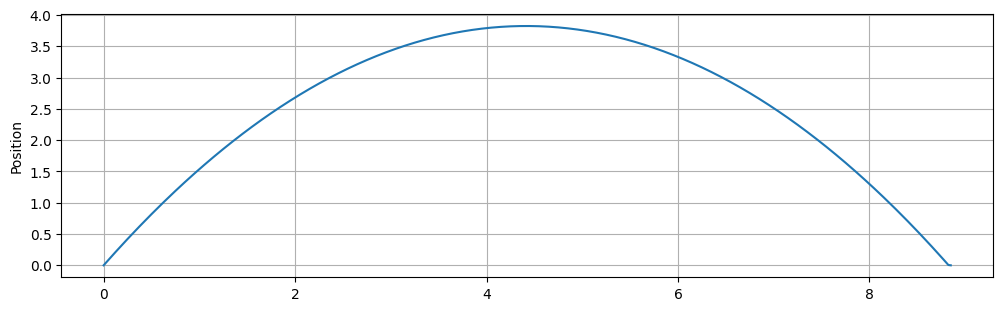

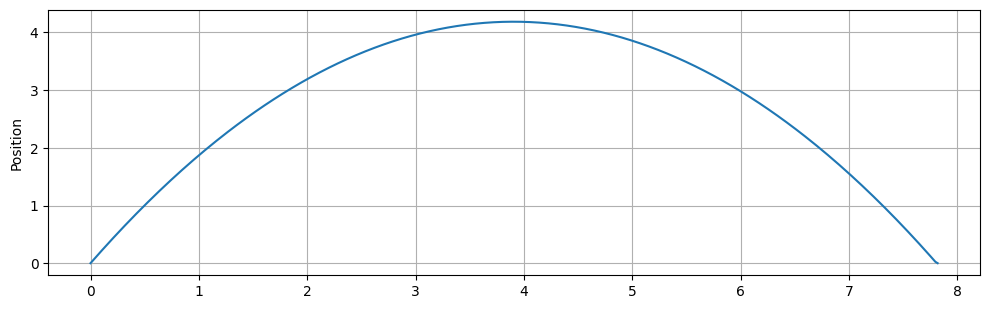

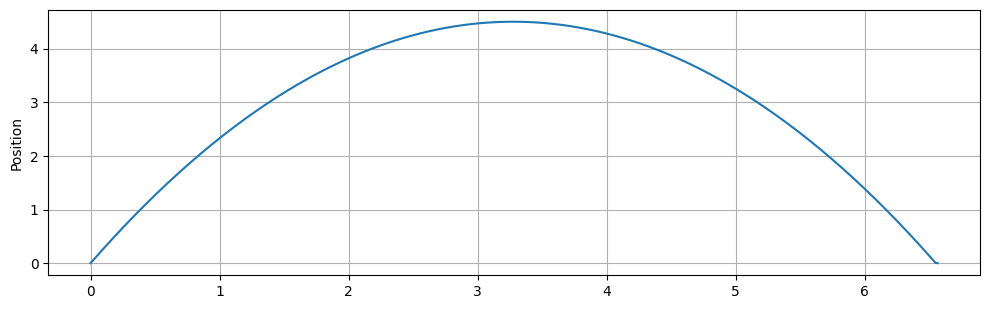

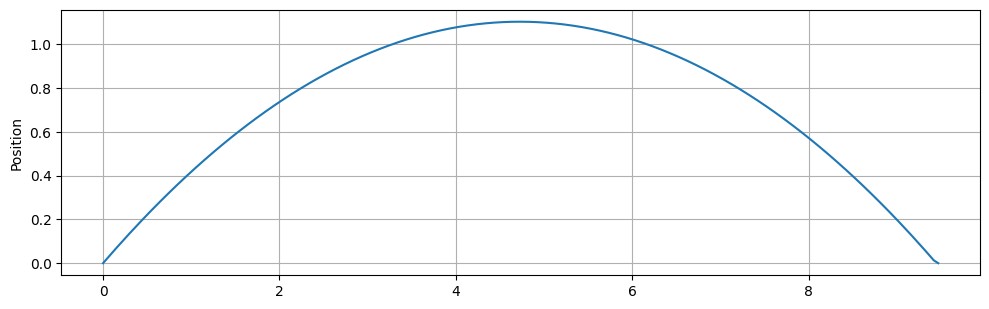

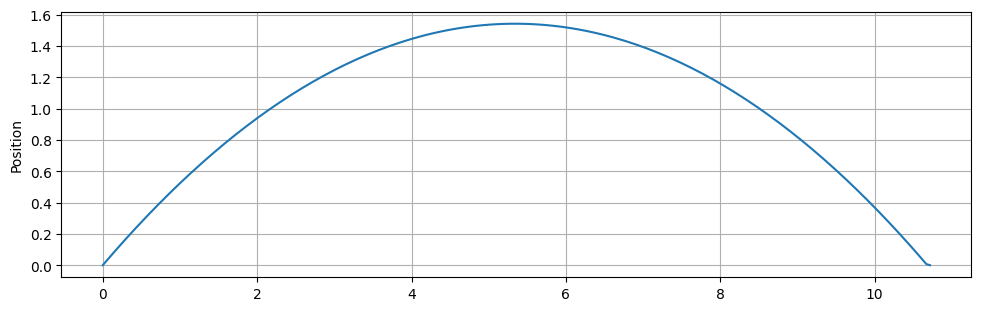

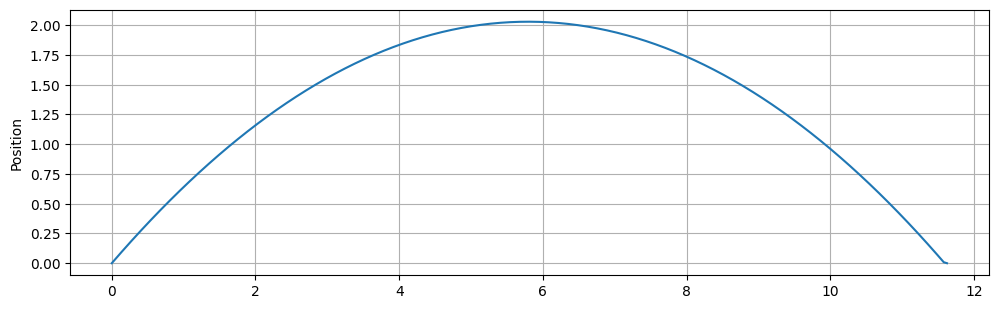

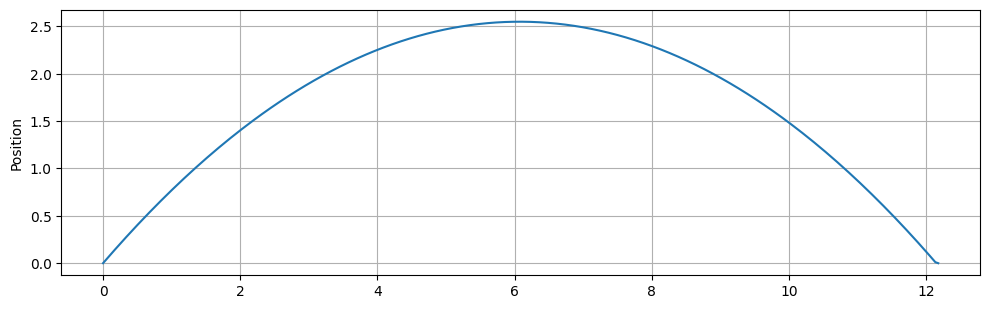

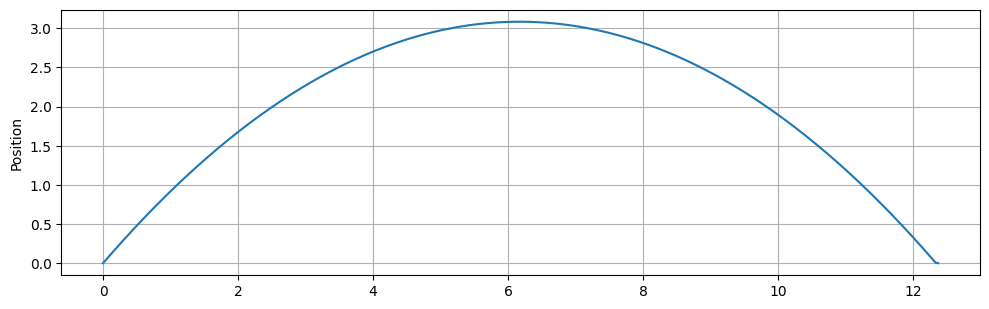

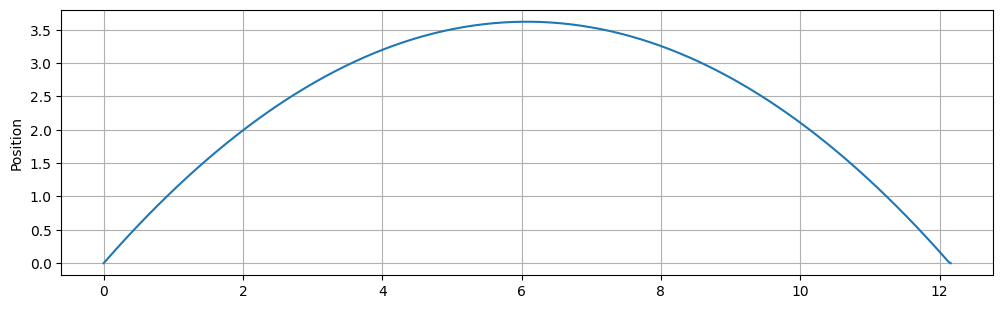

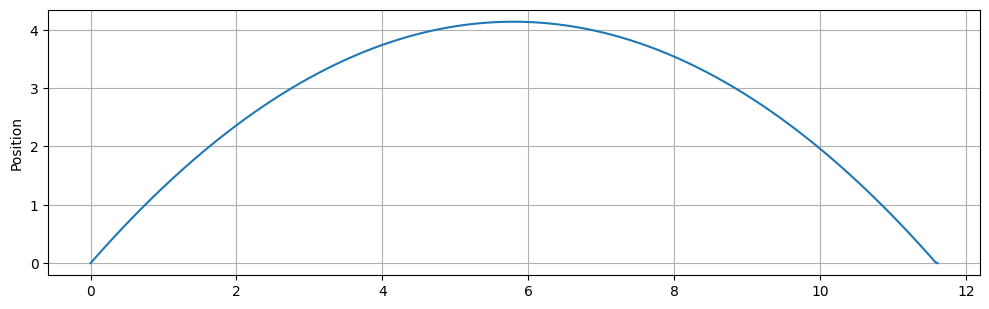

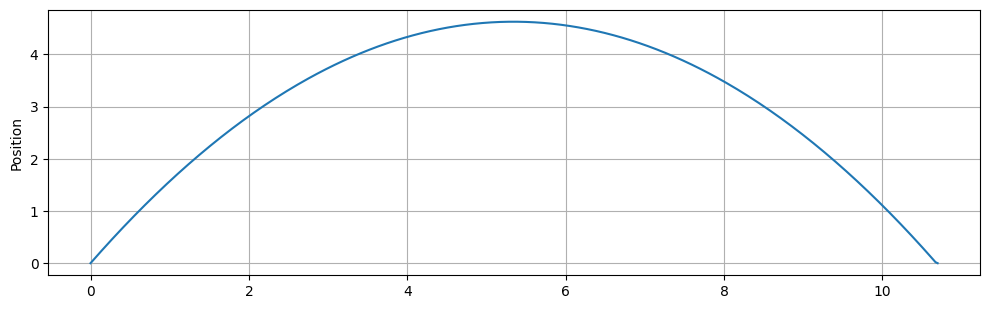

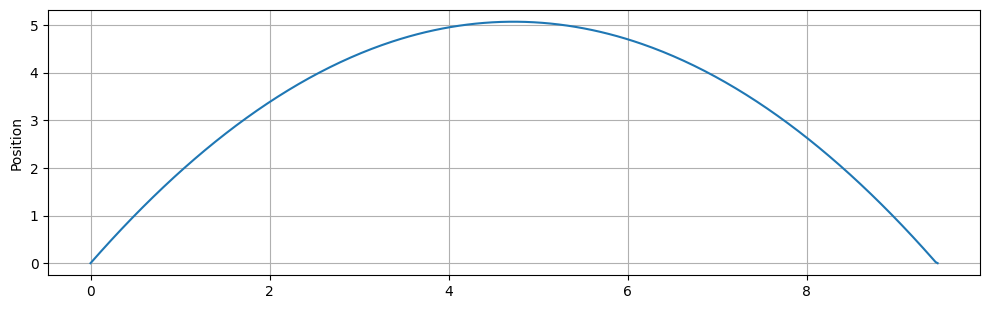

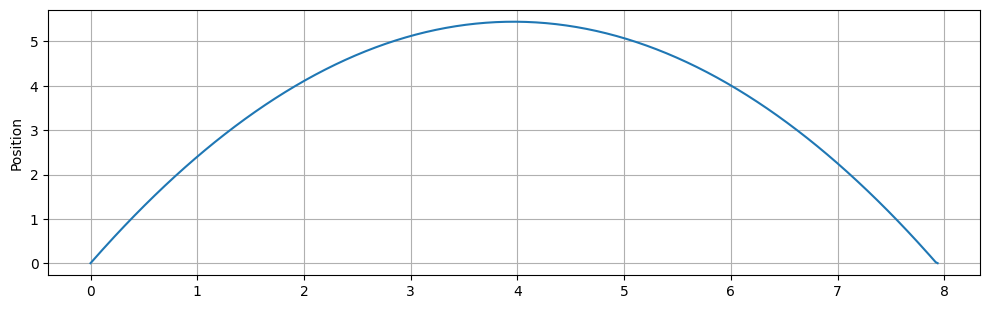

In [37]:
data_rows = []

target_x=1.9
target_y=0.7
eps=0.1
for v_init in range(6,12,1):
    for angle in range(25,75,5):
                                    t, x, y, ran,ht=projectile_motion_profile(v_init,angle, dt=0.005, pl=True)
                                    in_target=0
                                    for ii in range(0,len(t-1),1):
                                            if (x[ii] >= target_x- eps and x[ii] <= target_x + eps) and (y[ii] >= target_y- eps and y[ii] <= target_y + eps) :
                                                in_target=1
                                                    
                                    row_data = {
                                            'Initial_Vel': v_init,
                                            'Angle': angle,
                                            'Time': max(t),    
                                            'Max_Horz': max(x),
                                            'Max_Vert': max(y),
                                            'Target' : in_target

                                    }
                                    data_rows.append(row_data)

In [36]:
import pandas as pd


# Initialize an empty list to store row data

# Simulate an iterative process to generate data


# Create the DataFrame once all data is collected
df = pd.DataFrame(data_rows)
pd.set_option('display.max_rows', None)
print(df)
df.to_csv('output_angle.csv', index=False)


    Initial_Vel  Angle   Time       Horz      Vert  Target
0             6     25  0.520   2.827680  0.327706       0
1             6     30  0.615   3.195634  0.458712       0
2             6     35  0.705   3.465013  0.603648       1
3             6     40  0.790   3.631051  0.758104       1
4             6     45  0.865   3.669884  0.917401       0
5             6     50  0.940   3.625322  1.076731       0
6             6     55  1.005   3.458666  1.231206       0
7             6     60  1.060   3.180000  1.376146       0
8             6     65  1.110   2.814638  1.507142       0
9             6     70  1.150   2.359939  1.620224       1
10            7     25  0.605   3.838213  0.446048       0
11            7     30  0.715   4.334457  0.624347       1
12            7     35  0.820   4.701933  0.821634       1
13            7     40  0.920   4.933326  1.031878       0
14            7     45  1.010   4.999245  1.248725       0
15            7     50  1.095   4.926967  1.465552      

In [2]:
# https://www.gobilda.com/content/spec_sheets/5203-2402-0027_spec_sheet.pdf
 # From this motor:
#Stall Torque @ 12VDC: 38.0 kg.cm (530 oz-in.)
#Stall Current @ 12VDC: 9.2A
#COnverting to SI
#rated rpm 220

volt=12
stall_torque=0.19 #NM
stall_current=9.2 #amps
system_mass=10.5 #kg
Mecannum_wheel_radius=0.096 #96mm
rated_rpm=319*0.8 #rpm 
num_motors=4 # number of motors


start_coord=[0.29,0.29] #meters
end_coord=[1.4,2.1] # meters
v_max = min((Mecannum_wheel_radius*2*3.14*rated_rpm)/60,1.8)    # max velocity in m/s
safety_factor=2 # for design considerations not used

# eta calculated based on firs pass


Torque_const=stall_torque/stall_current
rated_torque=0.2 #(near max power)
J=(system_mass)/num_motors
a_max = (rated_torque/Mecannum_wheel_radius)/J    
distance=np.sqrt((end_coord[0]-start_coord[0])**2+(end_coord[1]-start_coord[1])**2)


In [3]:
# this is a test to invoke locally
%run -i "C:\Users\rupsm\Robotics\FTC_SystemSim\FTC_SystemSim\Robotics\FTC_SystemSim\main.py"
# this is a test to invoke using git clone


original_t_acc:2.268
updated_t_acc:1.6356337610375364
Distance too short to reach v_max with given acceleration.
vmax:1.2981220325694736


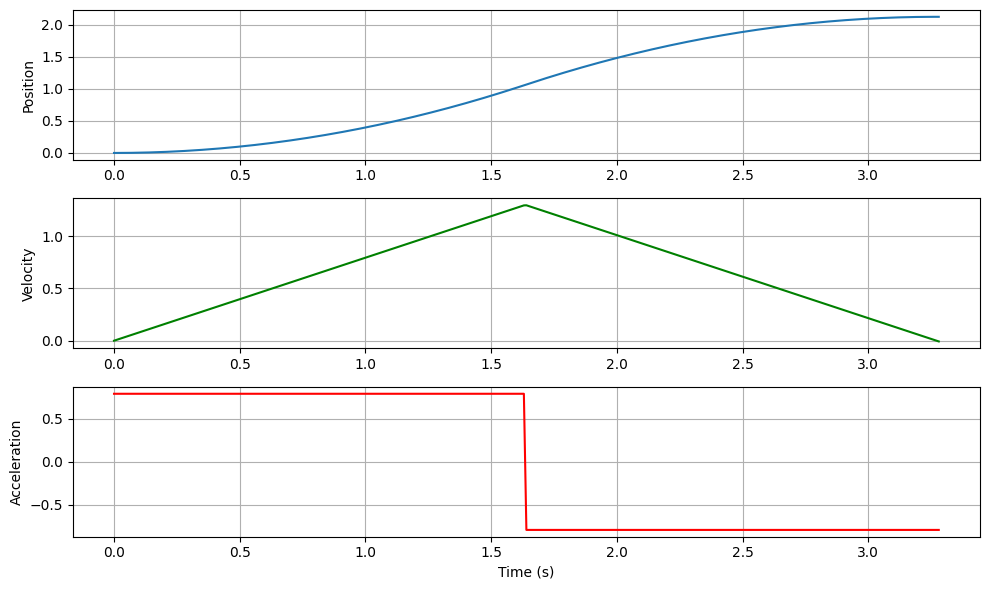

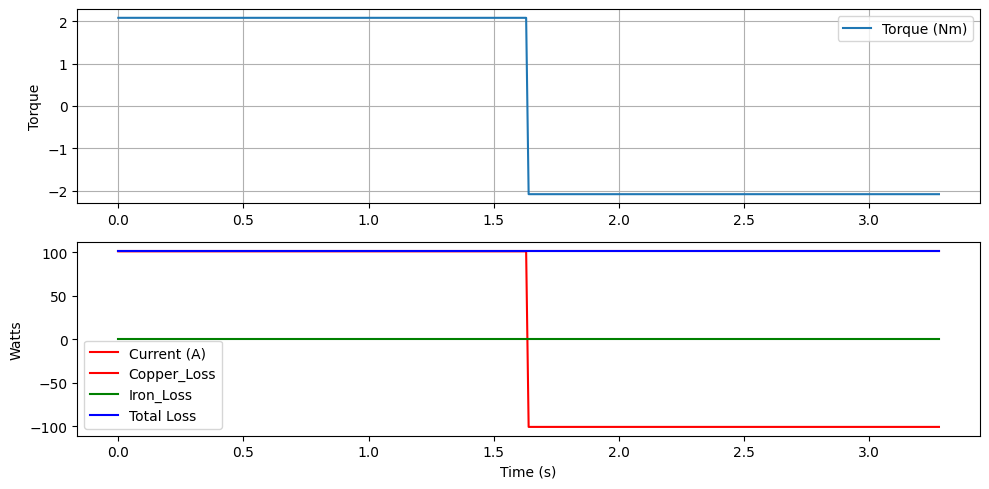

MovieWriter ffmpeg unavailable; using Pillow instead.


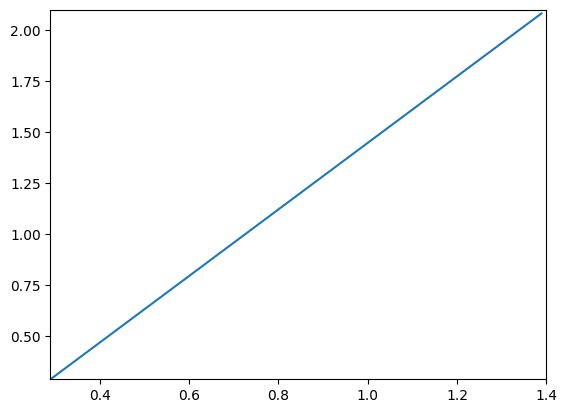

In [4]:
# Example usage
t, x, v, a = trapezoidal_motion_profile(distance, v_max, a_max,pl=True)
current, torque=compute_motor_current(a, t, J,Torque_const, T_load=None)
copper_loss,iron_loss=compute_motor_losses(current,v,t, 0.01, 1,0.01,pl=True)
animate(t,start_coord,end_coord,pts=100,filename="func_test.gif")


In [6]:
#% Total efficiency exepected
eta= (np.sum(abs(iron_loss))/np.sum(abs(current)))+ (np.sum(abs(copper_loss))/np.sum(abs(current)))
print(eta)
print(Torque_const)
print(a_max)
print(stall_torque)
print((Mecannum_wheel_radius*2*3.14*rated_rpm)/60)


1.0088359068113006
0.02065217391304348
0.7936507936507937
0.19
2.5642496000000006


In [8]:
mean_intake=3
std_intake=3
num_cycles=7
idle_time=2
mean_shoot=3
std_shoot=2
proba_scoring=0.8
low_all_in=9
high_all_in=15
full_return_base=10


def calculate_control_limits(mean, std_dev, sigma_multiplier=3):
    """
    Calculates the Upper Control Limit (UCL) and Lower Control Limit (LCL).

    Args:
        mean (float): The mean of the process data.
        std_dev (float): The standard deviation of the process data.
        sigma_multiplier (int, optional): The number of standard deviations
                                          from the mean. Defaults to 3.

    Returns:
        tuple: A tuple containing the UCL and LCL.
    """
    ucl = mean + (sigma_multiplier * std_dev)
    lcl = mean - (sigma_multiplier * std_dev)
    return ucl, lcl

intake_ucl, intake_lcl=calculate_control_limits(mean_intake, std_intake, sigma_multiplier=1)
shoot_ucl, shoot_lcl=calculate_control_limits(mean_shoot, std_shoot, sigma_multiplier=1)





mean_cycle_time=max(t)*2+mean_intake+mean_shoot+idle_time
nom_allowable_cycle=np.floor(100/mean_cycle_time)
print('nom_allowable_cycle:'+str(nom_allowable_cycle))
nom_score=nom_allowable_cycle*proba_scoring*((high_all_in+low_all_in)*0.5)+full_return_base
print('nom_points:'+str(nom_score))

upper_cycle_time=max(t)*2+max(1.5*mean_intake,intake_ucl)+max(1.5*mean_shoot,shoot_ucl)+idle_time
lower_allowable_cycle=np.floor(100/upper_cycle_time)
print('lower_allowable_cycle:'+str(lower_allowable_cycle))
low_score=lower_allowable_cycle*proba_scoring*((high_all_in+low_all_in)*0.5) +full_return_base
print('low_points:'+str(low_score))

lower_cycle_time=max(t)*2+max(0.75*mean_intake,intake_lcl)+max(0.75*mean_shoot,shoot_lcl)+idle_time
upper_allowable_cycle=np.floor(100/lower_cycle_time)
print('high_allowable_cycle:'+str(upper_allowable_cycle))
high_score=upper_allowable_cycle*proba_scoring*((high_all_in+low_all_in)*0.5)+full_return_base
print('high_points:'+str(high_score))



nom_allowable_cycle:6.0
nom_points:67.60000000000001
lower_allowable_cycle:5.0
low_points:58.0
high_allowable_cycle:7.0
high_points:77.2
